In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import glob
import numpy as np

%matplotlib inline

In [2]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict['n_cars'] = len(car_list)
    
    # Define a key "n_notcars" and store the number of notcar images
    data_dict['n_notcars'] = len(notcar_list)
    
    # Read in a test image, either car or notcar
    test_img = cv2.imread(car_list[0])
    
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict['image_shape'] = test_img.shape
    
    # Define a key "data_type" and store the data type of the test image.
    data_dict['data_type'] = test_img.dtype
    
    # Return data_dict
    return data_dict

In [3]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

### Data Ingestion

In [4]:
# grab list of files for positive and negative class
vh = glob.glob("./kitti_gti_dataset/vehicles/*/*.png")
x_vh = glob.glob("./kitti_gti_dataset/non-vehicles/*/*.png")

In [5]:
# Take a peek into the data
data_look(vh,x_vh)

{'data_type': dtype('uint8'),
 'image_shape': (64, 64, 3),
 'n_cars': 8792,
 'n_notcars': 8968}

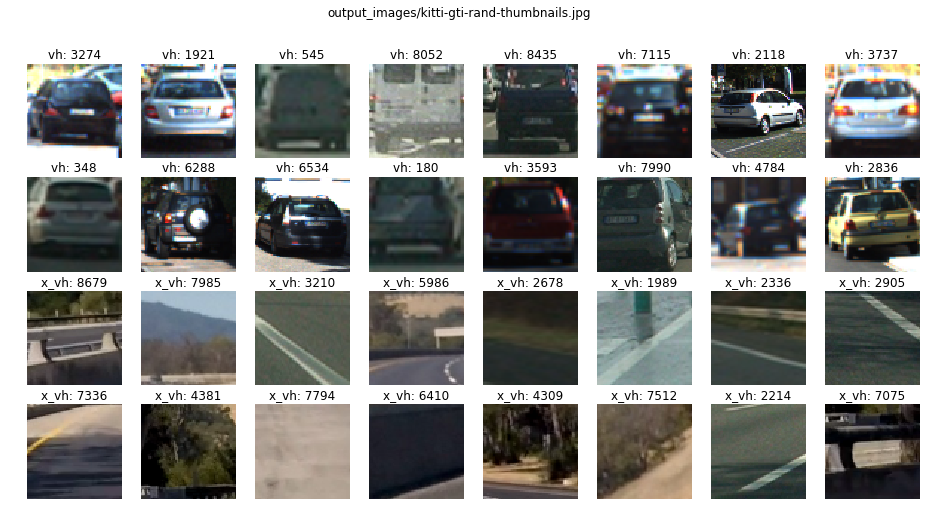

In [6]:
# Random Data Visualization 

rows = 4; cols = 8

# random selection of indices of vehicle and non-vehicle for plottin
vh_idxes = np.random.choice(range(0,len(vh)), int(rows*cols/2), replace=False)
x_vh_idxes = np.random.choice(range(0,len(x_vh)), int(rows*cols/2), replace=False)

# set up canvas and axes
f, ax = plt.subplots(rows, cols, figsize=(cols*2,rows*2))

# offset for plotting non-vehicles
row_offset = int(rows/2)

for i, idx in enumerate(vh_idxes):
    r = int(i/cols); c = i%cols
    ax[r,c].imshow(plt.imread(vh[idx]))
    ax[r,c].axis('off')
    ax[r,c].set_title('vh: ' + str(idx))
    
for i, idx in enumerate(x_vh_idxes):
    r = int(i/cols) + row_offset; c = i%cols
    ax[r,c].imshow(plt.imread(x_vh[idx]))
    ax[r,c].axis('off')
    ax[r,c].set_title('x_vh: ' + str(idx))
    
# save figure
imgpth = 'output_images/kitti-gti-rand-thumbnails.jpg'
f.suptitle(imgpth)
# f.tight_layout()
# f.subplots_adjust(top=0.95)
f.savefig(imgpth)

### Feature Extraction

#### Color Space Exploration

In [7]:
def convert_color(image, color_space='RGB'):
    # assume source color space is BGR
    # which is the default cv2.imread of jpeg/png
    if color_space == 'LUV':
        return cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
    elif color_space == 'HSV':
        return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    elif color_space == 'YUV':
        return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    elif color_space == 'YCrCb':
        return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    elif color_space == 'RGB':
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        return None

In [8]:
from mpl_toolkits.mplot3d import Axes3D
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

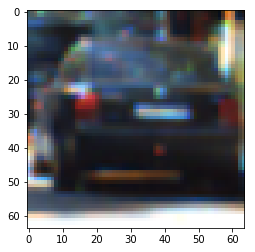

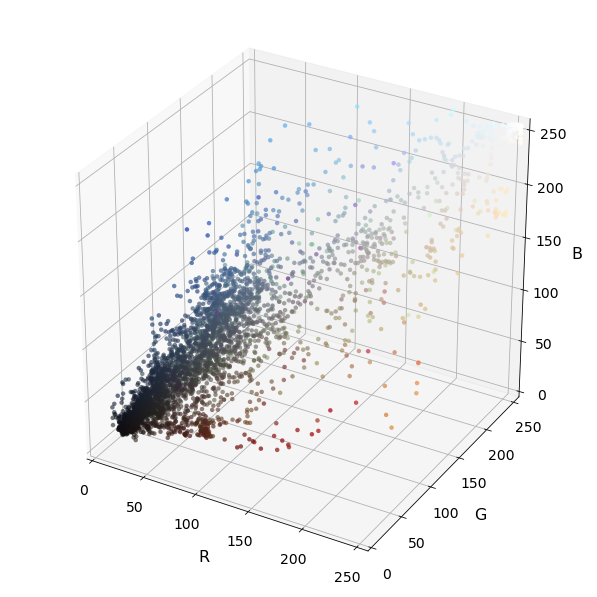

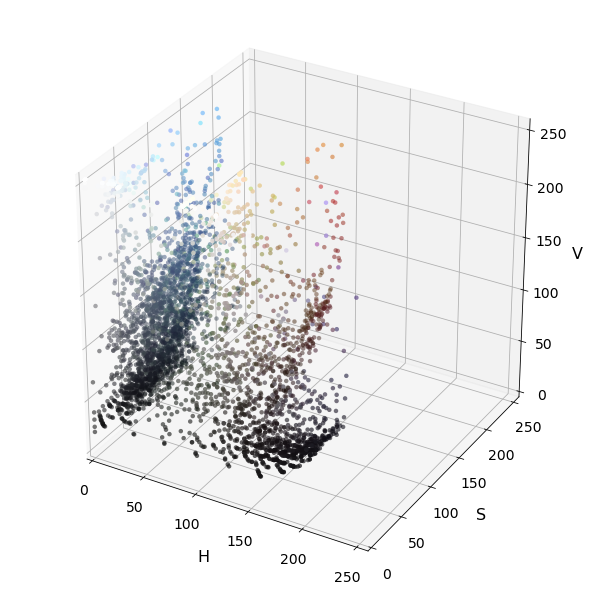

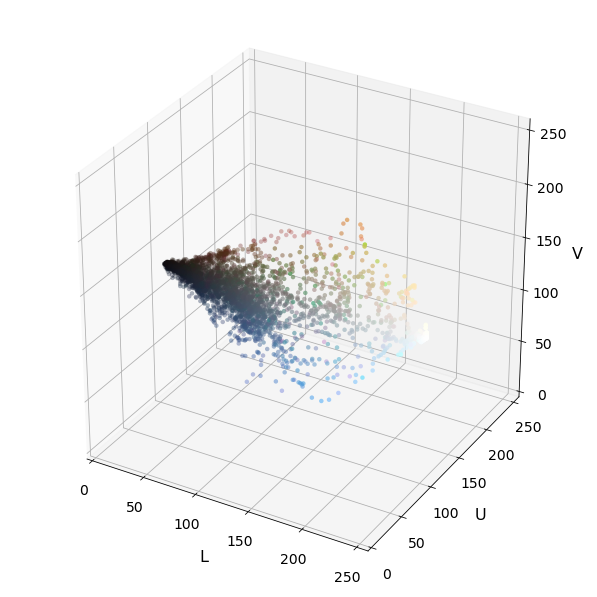

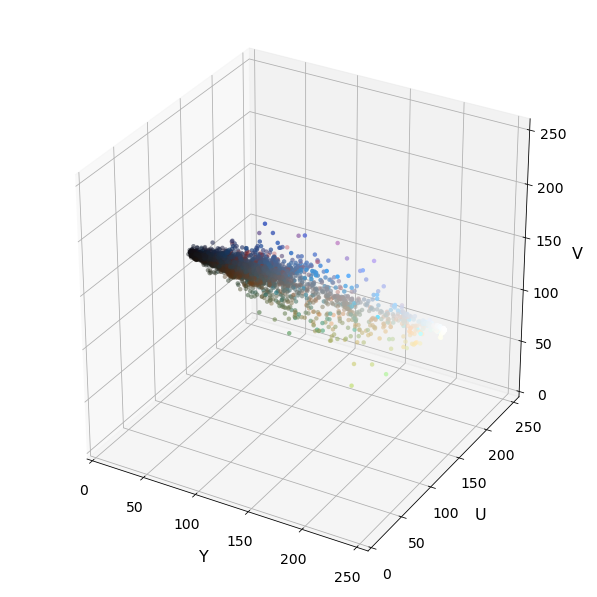

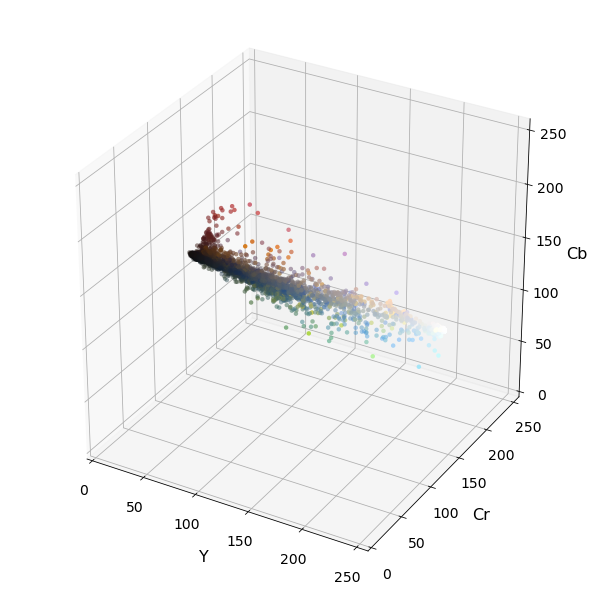

In [9]:
# Read a color image
img = cv2.imread(np.random.choice(vh))

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = convert_color(img_small, color_space='RGB') 
img_small_HSV = convert_color(img_small, color_space='HSV')
img_small_LUV = convert_color(img_small, color_space='LUV')
img_small_YUV = convert_color(img_small, color_space='YUV')
img_small_YCrCb = convert_color(img_small, color_space='YCrCb')

img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=["Y","Cr","Cb"])
plt.show()


#### Color Histogram

In [10]:
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    
    # Generating bin centers
    bin_edges = channel1_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return bin_centers, hist_features

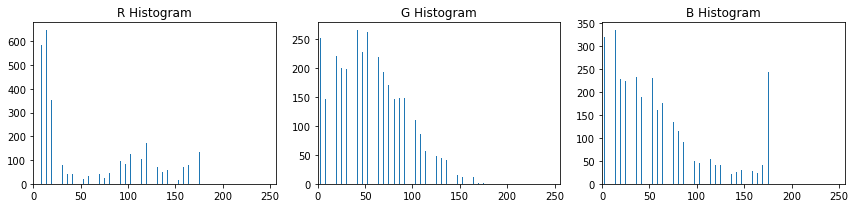

In [11]:
bincen, hist_features = color_hist(convert_color(img, color_space='HSV'), nbins=32)

# Plot a figure with all three bar charts
nfeatures_per_channel = hist_features.shape[0]//3

fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bincen, hist_features[0:nfeatures_per_channel])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bincen, hist_features[nfeatures_per_channel:nfeatures_per_channel*2])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bincen, hist_features[nfeatures_per_channel*2:])
plt.xlim(0, 256)
plt.title('B Histogram')
fig.tight_layout()

#### Spatial Binning

The intuition about spatial binning is about the vehicle brake light.

In [12]:
def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

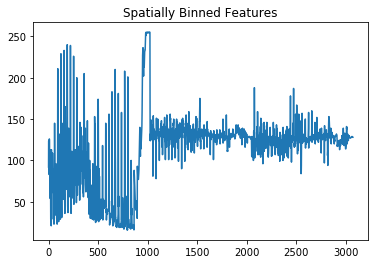

In [13]:
feature_vec = bin_spatial(convert_color(img, color_space = 'YCrCb'))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

#### Histogram of Oriented Features

In [14]:
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, fv=True):
    features, hog_image = hog(img, orientations=orient, 
                              pixels_per_cell=(pix_per_cell, pix_per_cell),
                              cells_per_block=(cell_per_block, cell_per_block), 
                              transform_sqrt=False, visualise=True, 
                              feature_vector=fv)
    
    return features, hog_image

/home/vuiseng9/miniconda2/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


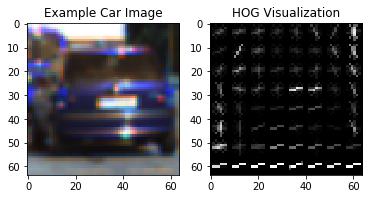

In [15]:
# Generate a random index to look at a car image
ind = np.random.randint(0, len(vh))
# Read in the image
image = cv2.imread(vh[ind])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block)


# Plot the examples
f, ax = plt.subplots(1,2, figsize=(6,3))
ax[0].imshow(image)
ax[0].set_title('Example Car Image')
ax[1].imshow(hog_image, cmap='gray')
ax[1].set_title('HOG Visualization')

#### Feature Extraction Wrapper

In [16]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='HSV', 
                     spatial_size=(16, 16),hist_bins=16, 
                     hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2):
    
    # Create a list to append feature vectors to
    features = []
    
    # Iterate through the list of images
    for f in imgs:
        # Read in each one by one
        # print(f)
        img = cv2.imread(f)
        
        # apply color conversion if other than 'RGB'
        feature_image = convert_color(img, color_space=color_space)
        
        # Apply bin_spatial() to get spatial color features
        bin_fv = bin_spatial(feature_image, size = spatial_size)
        
        # Apply color_hist() to get color histogram features
        bincen, hist_fv = color_hist(feature_image, nbins=hist_bins)

        # Assuming 2nd channel because L channel of HLS is assumed
        hog_fv, hog_img = get_hog_features(feature_image[:,:,1], 
                                           hog_orient, hog_pix_per_cell, hog_cell_per_block)
        
        features.append(np.concatenate((bin_fv, hist_fv, hog_fv)))
        
    # Return list of feature vectors
    return features

In [17]:
vh_features = extract_features(vh)
x_vh_features = extract_features(x_vh)

/home/vuiseng9/miniconda2/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [23]:
import pickle

kitti_gti_features = {}
kitti_gti_features['vh_features'] = vh_features
kitti_gti_features['x_vh_features'] = x_vh_features

pickle.dump(kitti_gti_features, open("kitti_gti_features.p","wb"))

### Building a SVM Classifier

In [24]:
# Combining all features
X = vh_features + x_vh_features

# Target binarization
y = np.ones(len(vh_features), dtype=np.int).tolist() + np.zeros(len(x_vh_features), dtype=np.int).tolist()

In [25]:
# Feature Normalization
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

In [26]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test set in 8:2 ratio with stratification
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
print(len(X_train), len(y_train), len(X_test), len(y_test), y_test.count(0),y_test.count(1))

14208 14208 3552 3552 1794 1758


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)

print(acc)

0.962274774775


In [31]:
vh_clf = {}
vh_clf['classifier'] = clf
vh_clf["scaler"] = X_scaler
vh_clf["hog_orient"] = X_scaler
vh_clf["hog_pix_per_cell"] = 8
vh_clf["hog_cell_per_block"] = 2
vh_clf["spatial_size"] = 16
vh_clf["hist_bins"] = 16

pickle.dump(vh_clf, open("kitti_gti_classfier.p","wb"))

In [211]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def slide_extract_classify(img, ystart, ystop, scale, color_space,
                           svc, X_scaler, 
                           hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2, 
                           spatial_size=(16,16), hist_bins=16):

    # hog_orient=9; hog_pix_per_cell=8; hog_cell_per_block=2

    draw_img = np.copy(img)
    img = img.astype(np.float32)/255

    img_search_area = convert_color(img[ystart:ystop,:,:], color_space=color_space)

#     print("img_search_area:", img_search_area.shape)

    if scale != 1:
        imshape = img_search_area.shape
        img_search_area = cv2.resize(img_search_area, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

#     print("img_search_area_resized:", img_search_area.shape)

    ch1 = img_search_area[:,:,0]
    ch2 = img_search_area[:,:,1]
    ch3 = img_search_area[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2

#     print(nxblocks, nyblocks, nfeat_per_block)

    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

#     print(nblocks_per_window, cells_per_step, nxsteps, nysteps)

    # Compute individual channel HOG features for the entire image
    hog1, hog1_img = get_hog_features(ch1, hog_orient, hog_pix_per_cell, hog_cell_per_block, False)
    hog2, hog2_img = get_hog_features(ch2, hog_orient, hog_pix_per_cell, hog_cell_per_block, False)
    hog3, hog3_img = get_hog_features(ch3, hog_orient, hog_pix_per_cell, hog_cell_per_block, False)

    on_windows = []
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step

            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
#             hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            hog_features = hog_feat2
    
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(img_search_area[ytop:ytop+window, xleft:xleft+window], (64,64))

#             print("xb:", xb, "yb:", yb, "ypos:", ypos, "xpos:", xpos, 
#                   "hog_feat1 size:", hog_feat1.shape, "xleft:", xleft, "ytop:", ytop, 
#                   "subimg:", subimg.shape)

            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            bincen, hist_features = color_hist(subimg, nbins=hist_bins)
#             print(spatial_features.shape)
#             print(hist_features.shape)
#             print(hog_features.shape)
#             print(np.hstack((spatial_features, hist_features, hog_features)).shape)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    

            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)

            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                
                detected_win = ((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart))
                cv2.rectangle(draw_img, detected_win[0], detected_win[1],(0,0,255),6)
                
                on_windows.append(detected_win)
                
    return on_windows

In [215]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [223]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

from scipy.ndimage.measurements import label

/home/vuiseng9/miniconda2/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


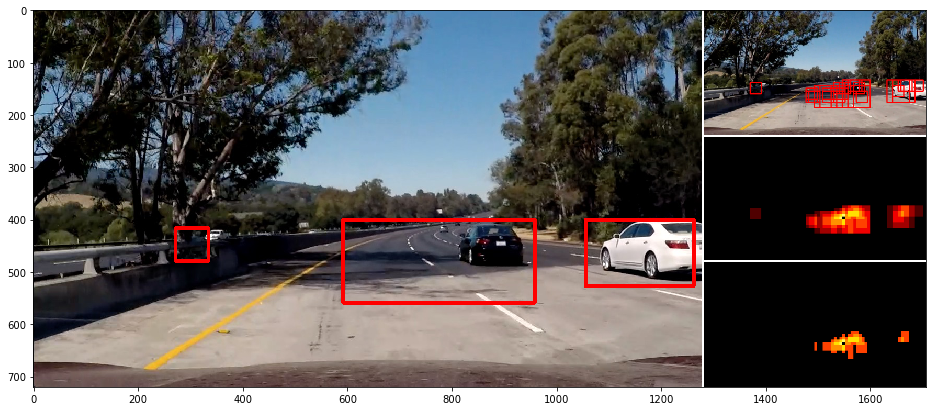

In [321]:
img = cv2.imread('test_images/test5.jpg')
# plt.imshow(img)

ystart = 400
ystop = 688
scales = [1,2.5,2,2.5,3]

color_space = 'HSV'

windows_list = []

for scale in scales:
    windows_list.extend(slide_extract_classify(img, ystart, ystop, scale, color_space,
                                     clf, X_scaler, 
                                     hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2, 
                                     spatial_size=(16,16), hist_bins=16))

window_img = draw_boxes(img, windows_list, color=(0, 0, 255), thick=6)

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
heat = np.zeros_like(img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,windows_list)
heatmap = np.clip(heat, 0, 255)
    
# Apply threshold to help remove false positives
heat_thres = apply_threshold(heat,3)

# Visualize the heatmap when displaying    
heatmap_thres = np.clip(heat_thres, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

# Create a collage of images as a single frame for final video
collage = np.zeros([720,1280+427,3],dtype='uint8')
collage[0:720,0:1280,:] = draw_img
collage[0:240,1280:,:] = cv2.resize(window_img, (427, 240), 
                                    interpolation=cv2.INTER_AREA)
collage[240:480,1280:,:] = cv2.resize(cv2.applyColorMap(heatmap.astype('uint8')*32, cv2.COLORMAP_HOT)
                                      , (427, 240), interpolation=cv2.INTER_AREA)
collage[480:,1280:,:] = cv2.resize(cv2.applyColorMap(heatmap_thres.astype('uint8')*32, cv2.COLORMAP_HOT)
                                      , (427, 240), interpolation=cv2.INTER_AREA)

collage[:,1278:1282,:]=255
collage[238:242,1280:,:]=255
collage[478:482,1280:,:]=255

plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(collage, cv2.COLOR_BGR2RGB))


In [334]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from tqdm import tqdm # progress bar

In [335]:
def process_imgs(srcdir, dstdir):
    raw_imgs= sorted(glob.glob(srcdir + '/*.jpg'))
    
    if not os.path.exists(dstdir):
        os.makedirs(dstdir)
        
    ystart = 400
    ystop = 688
    scales = [1,2.5,2,2.5,3]
    color_space = 'HSV'
        
    for i in tqdm(range(0, len(raw_imgs))):
        image = cv2.imread(raw_imgs[i])

        windows_list = []

        for scale in scales:
            windows_list.extend(slide_extract_classify(img, ystart, ystop, scale, color_space,
                                             clf, X_scaler, 
                                             hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2, 
                                             spatial_size=(16,16), hist_bins=16))

        window_img = draw_boxes(img, windows_list, color=(0, 0, 255), thick=6)

        # Read in a pickle file with bboxes saved
        # Each item in the "all_bboxes" list will contain a 
        # list of boxes for one of the images shown above
        heat = np.zeros_like(img[:,:,0]).astype(np.float)

        # Add heat to each box in box list
        heat = add_heat(heat,windows_list)
        heatmap = np.clip(heat, 0, 255)

        # Apply threshold to help remove false positives
        heat_thres = apply_threshold(heat,3)

        # Visualize the heatmap when displaying    
        heatmap_thres = np.clip(heat_thres, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        draw_img = draw_labeled_bboxes(np.copy(img), labels)

        # Create a collage of images as a single frame for final video
        collage = np.zeros([720,1280+427,3],dtype='uint8')
        collage[0:720,0:1280,:] = draw_img
        collage[0:240,1280:,:] = cv2.resize(window_img, (427, 240), 
                                            interpolation=cv2.INTER_AREA)
        collage[240:480,1280:,:] = cv2.resize(cv2.applyColorMap(heatmap.astype('uint8')*32, cv2.COLORMAP_HOT)
                                              , (427, 240), interpolation=cv2.INTER_AREA)
        collage[480:,1280:,:] = cv2.resize(cv2.applyColorMap(heatmap_thres.astype('uint8')*32, cv2.COLORMAP_HOT)
                                              , (427, 240), interpolation=cv2.INTER_AREA)

        collage[:,1278:1282,:]=255
        collage[238:242,1280:,:]=255
        collage[478:482,1280:,:]=255
        cv2.imwrite(dstdir + "/" + os.path.basename(raw_imgs[i]), collage)
    # Compile video
    clip = ImageSequenceClip(dstdir, fps=25)
    clip.write_videofile(dstdir + '.mp4')

In [336]:
process_imgs('./test_video_imgs/', 'pipeline_v2')

|----------| 0/34   0% [elapsed: 00:00 left: ?, ? iters/sec]

/home/vuiseng9/miniconda2/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


OSError: [Errno 12] Cannot allocate memory